In [1]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math


from numpy.fft import rfft,irfft,rfftfreq
import numpy as np

In [ ]:
# test signal
# data = np.loadtxt('../data/test.csv')[0]

In [ ]:
# # test signal
# data = np.loadtxt('../data/test.csv')[0]

# #function to filter out frequencies in signal that are above the threshold
# def filter_signal(signal, threshold=5e3):
#     fourier = rfft(signal)
#     frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
#     fourier[frequencies > threshold] = 0
#     return irfft(fourier)

# clean_data = data[:20000]
# scaler = MinMaxScaler(feature_range=(0, 5)) #init scaler, scales between 0 and 5
# Y_old = scaler.fit_transform(np.asarray([i for i in range(len(clean_data)+1)]).reshape(-1,1)) #generate supervised output data

# actions = np.asarray([filter_signal(clean_data)[:4001]]) #X - equivalent to actions
# states = np.asarray(Y_old[:4001].copy()).T #Y - equivalent to states

# x = np.asarray([actions[0][:4001]])
# y = np.asarray([states[0][:4001]])



In [ ]:
# # standard normalization function 
# def standard_normalizer(x):
#     # compute the mean and standard deviation of the input
#     x_means = np.mean(x,axis = 1)[:,np.newaxis]
#     x_stds = np.std(x,axis = 1)[:,np.newaxis]   

#     # check to make sure thta x_stds > small threshold, for those not
#     # divide by 1 instead of original standard deviation
#     ind = np.argwhere(x_stds < 10**(-2))
#     if len(ind) > 0:
#         ind = [v[0] for v in ind]
#         adjust = np.zeros((x_stds.shape))
#         adjust[ind] = 1.0
#         x_stds += adjust

#     # create standard normalizer function
#     normalizer = lambda data: (data - x_means)/x_stds

#     # create inverse standard normalizer
#     inverse_normalizer = lambda data: data*x_stds + x_means

#     # return normalizer 
#     return normalizer,inverse_normalizer

In [ ]:
# normalizer,inverse_normalizer = standard_normalizer(x)
# x_normalized = normalizer(x)

# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(12,4))
# a = plt.subplot(1,2,1)
# plt.plot(x_normalized.flatten(),c='b')
# a = plt.subplot(1,2,2)
# plt.plot(y.flatten(),c='r')
# plt.show()

# # X_train = np.reshape(x_normalized, (x_normalized.T.shape[0], 1, x_normalized.T.shape[1]))
# # X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# # X_train.shape
# xin = x_normalized.reshape((1, 4001, 1))
# yin = y.reshape((1, 4001, 1))

# # fit and evaluate a model
# def evaluate_model(x,y):
#     verbose, epochs, batch_size = 0, 15, 64
#     n_timesteps, n_features, n_outputs = x.shape[1], 1, y.shape[1]
# #     print(n_timesteps)
# #     print(n_features)
# #     print(n_outputs)
#     model = Sequential()
#     model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(n_outputs, activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     # fit network
#     model.fit(x, y, epochs=epochs, batch_size=batch_size, verbose=verbose)
#     # evaluate model
#     _, accuracy = model.evaluate(x, y, batch_size=batch_size, verbose=0)
#     return accuracy,model

# a,model = evaluate_model(xin,y)
# print(a)
# model

In [10]:
# test signal
data = np.array([np.loadtxt('../data/test.csv')[0]]).T
# data = np.loadtxt('../data/test.csv')[0]
# data = filter_signal(data)
# data = np.array([data]).T

data = data[:20000]

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [12]:
data.shape

(20000, 1)

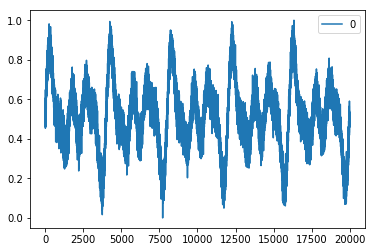

In [13]:
sns.lineplot(data = data)

In [3]:
# split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

13400 6600


In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [6]:
print(trainX.shape)
print(trainY.shape)
print()
print(testX.shape)
print(testY.shape)

(13398, 1, 1)
(13398,)

(6598, 1, 1)
(6598,)


In [7]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
13398/13398 - 25s - loss: 0.2497
Epoch 2/10
13398/13398 - 23s - loss: 0.1774
Epoch 3/10
13398/13398 - 22s - loss: 0.1725
Epoch 4/10
13398/13398 - 22s - loss: 0.1715
Epoch 5/10
13398/13398 - 24s - loss: 0.1717
Epoch 6/10
13398/13398 - 29s - loss: 0.1714
Epoch 7/10
13398/13398 - 24s - loss: 0.1713
Epoch 8/10
13398/13398 - 19s - loss: 0.1712
Epoch 9/10
13398/13398 - 21s - loss: 0.1712
Epoch 10/10
13398/13398 - 20s - loss: 0.1710


In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
from sklearn.metrics import mean_squared_error

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# nsamples, nx, ny = trainPredict.shape
# trainPredict = trainPredict.reshape((nsamples,nx*ny))

trainPredict = scaler.inverse_transform([trainPredict])
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform([testPredict])
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: ',trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: ',testScore)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
import matplotlib.pyplot as plt

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()